<a href="https://colab.research.google.com/github/luisahamon/Previsao-de-Salario/blob/main/Predicao_de_salario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto para prever o sálario de funcionários em uma empresa fictícia baseado na quantidade de anos de experiência

Projeto de estudo, com a finalidade de aprender Regressão Linear

In [2]:
import pandas as pd
dados = pd.read_csv('/content/Salary_dataset.csv')
dados

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
dados.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Não há dados nulos, mas  há uma coluna (Unnamed: 0) que não servirá para o propósito deste projeto

In [5]:
dados.drop('Unnamed: 0', axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


#Análise Gráfica

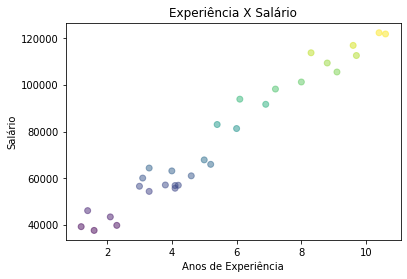

In [6]:
import matplotlib.pyplot as plt
plt.scatter(dados['YearsExperience'], dados['Salary'], alpha=0.5, 
                           c=dados['Salary'])
plt.title('Experiência X Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

Aparentemente existe uma correlação positiva entre essas duas variáveis

#Regressão Linear

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
x_train, x_val, y_train, y_val = train_test_split(dados['YearsExperience'], dados['Salary'], test_size=0.2, random_state=0)

In [9]:
modelo = LinearRegression()
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1,1)
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
modelo.fit(x_train, y_train)

x_val = x_val.to_numpy()
x_val = x_val.reshape(-1,1)
p = modelo.predict(x_val)

In [10]:
p

array([[ 40749.96184072],
       [122700.62295594],
       [ 64962.65717022],
       [ 63100.14214487],
       [115250.56285456],
       [107800.50275317]])

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
np.sqrt(mean_squared_error(y_val, p))

3580.9792373213454

In [13]:
modelo.coef_

array([[9312.57512673]])

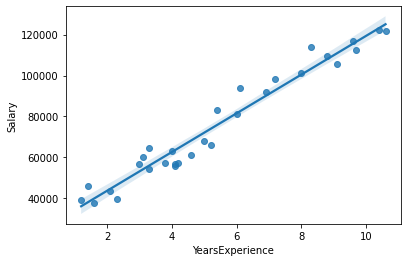

In [15]:
import seaborn as sns
sns.regplot(x = 'YearsExperience', y = 'Salary', data = dados)